# Hello!
### For this dataset I will use a random forest classifier in attempt to predict student performance outcomes. This is mostly intended for my own learning purposes. If you enjoy this notebook, please consider an upvote. I'm new to Kaggle, so I'm trying my best to build up my profile :)
### Let's start by importing the necessities.

In [22]:
#Necessities
import pandas as pd
import numpy as np
from scipy import stats

#Visualization
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Next is loading the data and some EDA.

In [23]:
df = pd.read_csv('Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [24]:
df=df.drop(columns=['StudentID'])
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Since there is a heavy presence of categorical variables, let's do count plots of how many instances we find of each categorical variable.

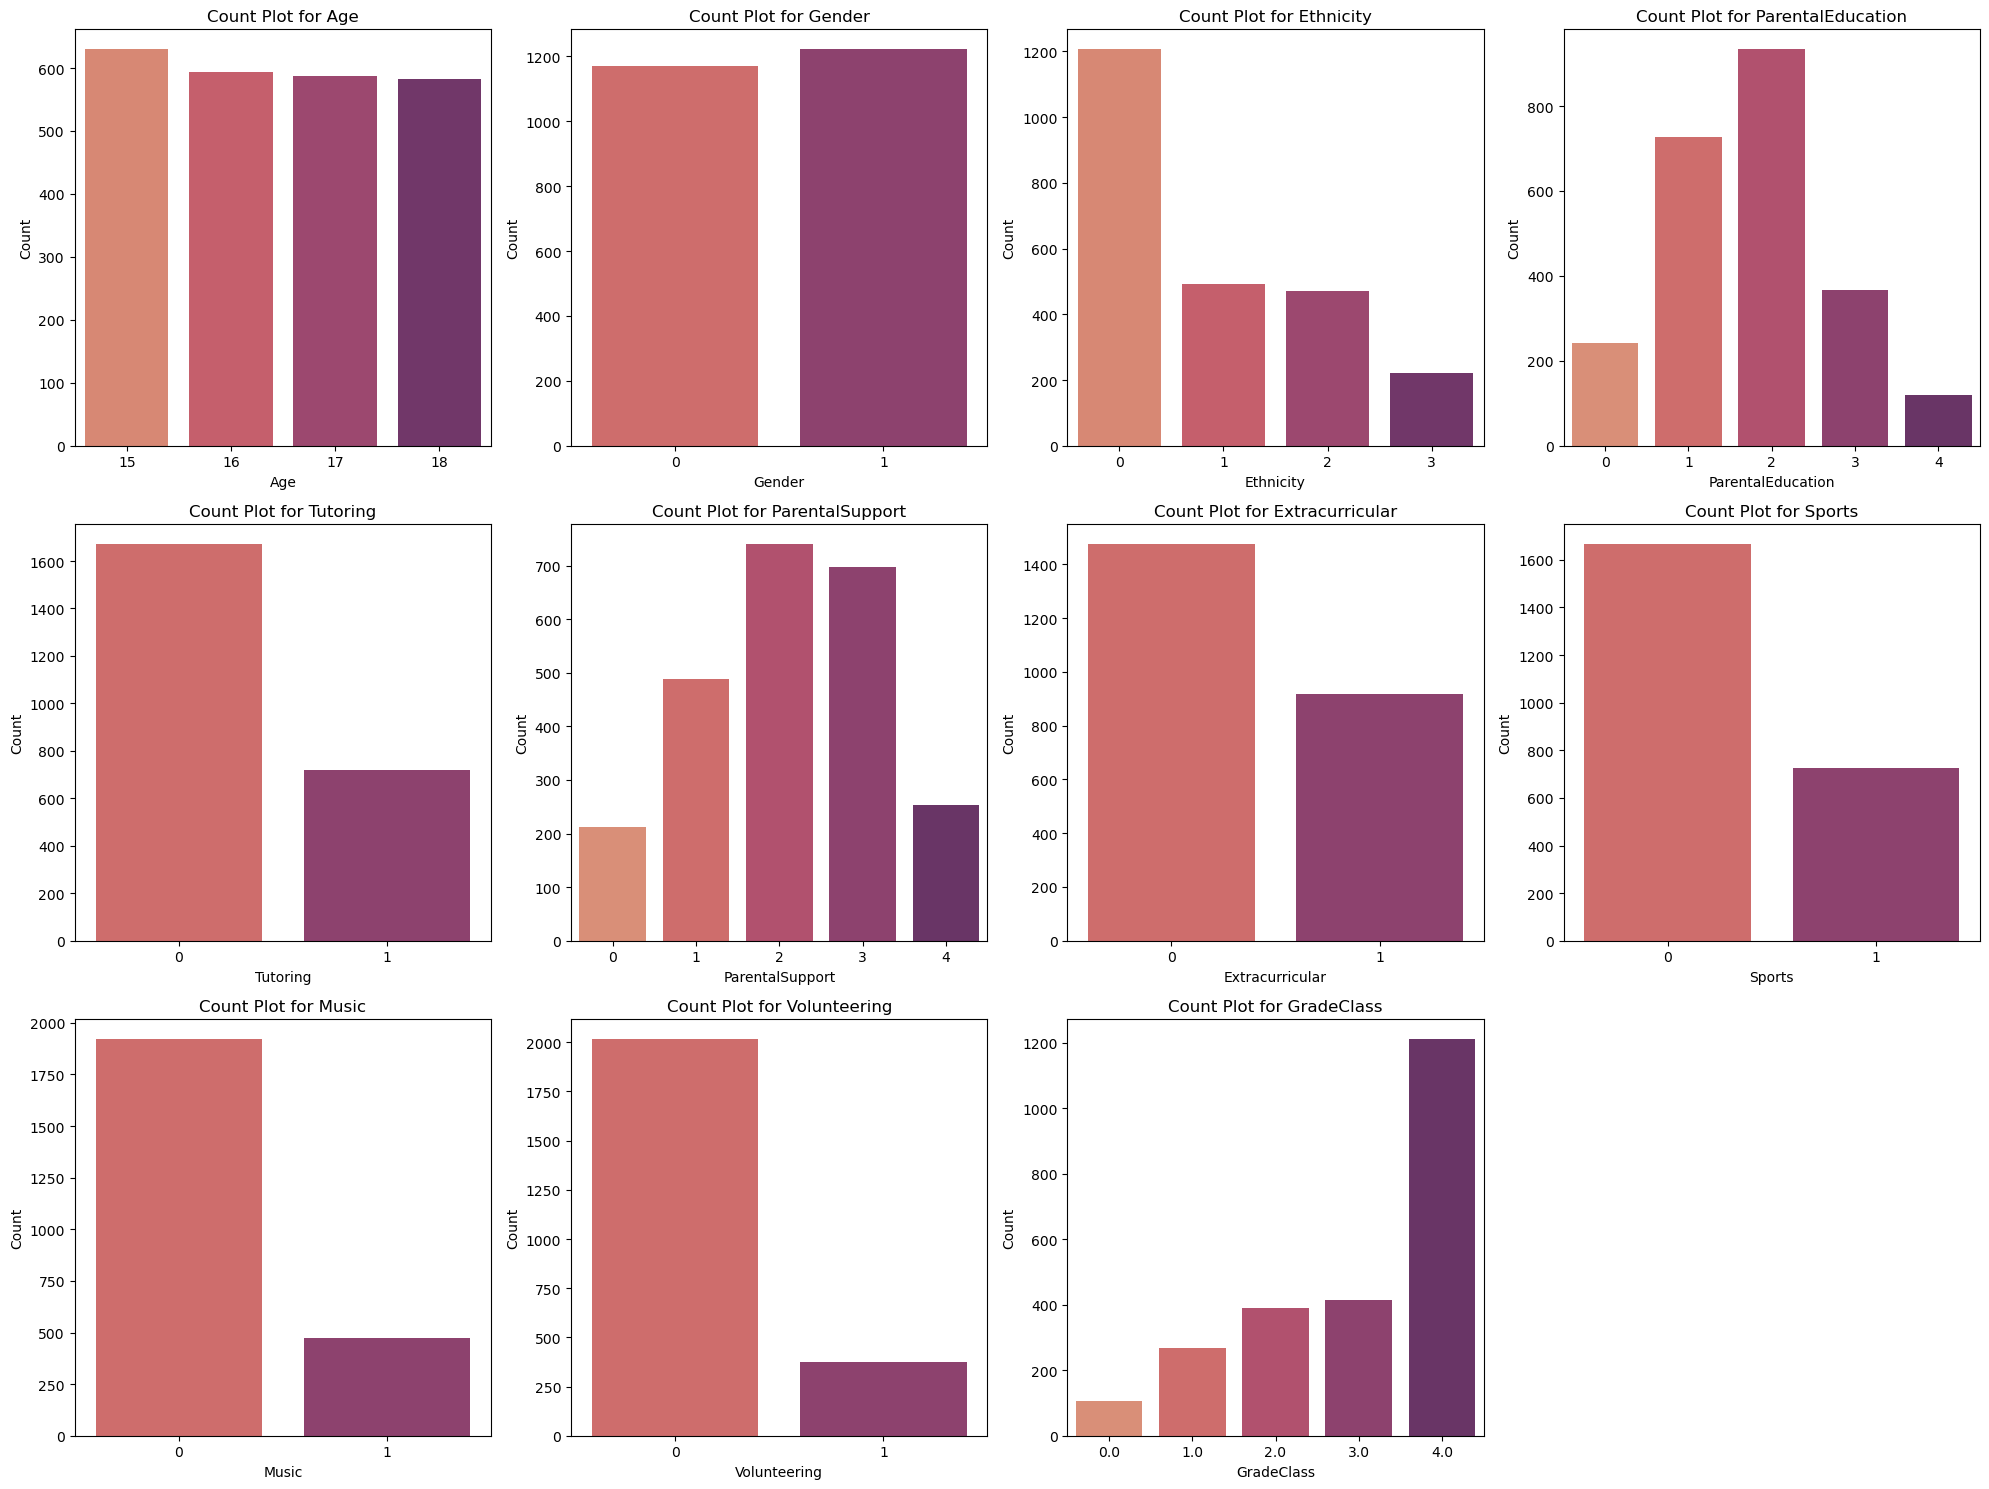

In [25]:
countplots = df.drop(columns=['Absences', 'StudyTimeWeekly','GPA'])
columns = countplots.columns

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axs = ax.flatten()

for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axs[i], palette='flare')
    axs[i].set_title(f'Count Plot for {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### Note the count plot for GradeClass. Whichever high school this is has a lot of work to do...

### Next, I want to run some simple linear regressions on our continuous predictive variable, GPA. This is not for classification, but it helps us get a sense of what kind of effect these features have on academic performance in general. For the regressions, I use the continuous variables ('StudyTimeWeekly','Absences') and non-binary categorical variables ('ParentalEducation','ParentalSupport') to predict GPA.

### I understand that the categorical variables are not necessarily appropriate for the purpose of linear regressions, but it is insightful to see how these variables affect academic performance anyway.

In [26]:
#Linear Regressions
import statsmodels.api as sm

y=df['GPA']
X=df[['ParentalEducation','Absences','StudyTimeWeekly','ParentalSupport']]
X=sm.add_constant(X)

model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     6430.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:41:12   Log-Likelihood:                -232.23
No. Observations:                2392   AIC:                             474.5
Df Residuals:                    2387   BIC:                             503.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7407      0.02

### From our regression results, we can see that absences have the most clear statistical relationship with the data, which can be seen clearly by the visualizations below. For every absence, we expect a student's GPA to drop by .0996 on average. Weekly study time and parental support appear to have a positive effect on GPA, though not as clearly as absences.

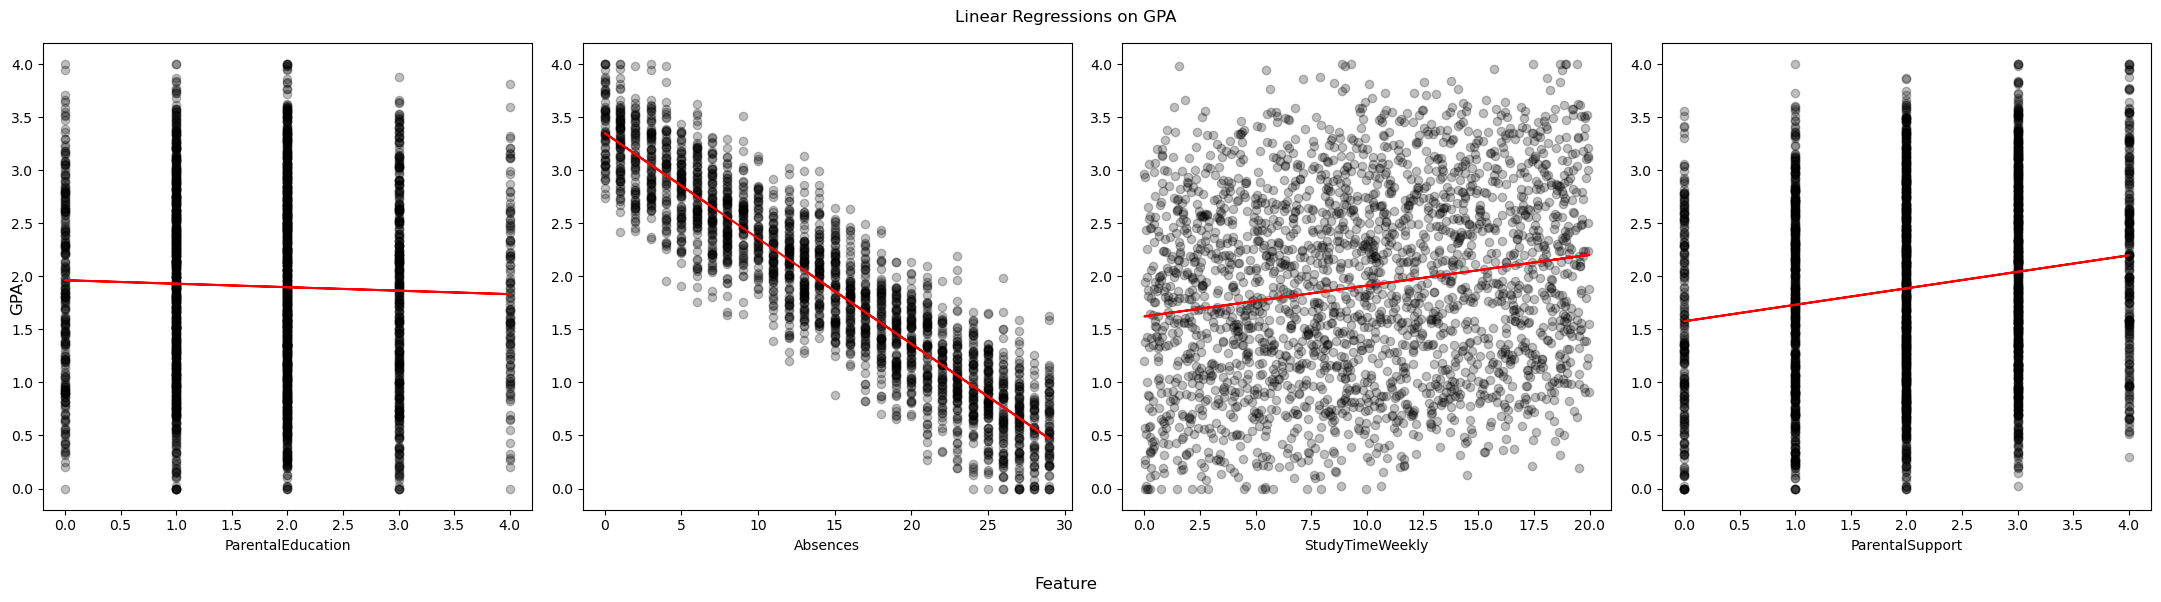

In [27]:
x_vars = ['ParentalEducation', 'Absences', 'StudyTimeWeekly', 'ParentalSupport']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
axs = ax.flatten()

for i, var in enumerate(x_vars):
    X = df[var]
    X = sm.add_constant(X)
    model = sm.OLS(df['GPA'], X).fit()
    predictions = model.predict(X)
    
    axs[i].scatter(df[var], df['GPA'], color='black', alpha=0.25)
    axs[i].plot(df[var], predictions, color='red')
    axs[i].set_xlabel(var)

fig.supylabel('GPA')  # Corrected the ylabel setting method
fig.supxlabel('Feature')  # Corrected the xlabel setting method
fig.suptitle('Linear Regressions on GPA')

plt.tight_layout()
plt.show()

### Now, let's move on to the actual random forest algorithm.

In [28]:
#Setup for random forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, explained_variance_score, accuracy_score,confusion_matrix

model_data=df.drop(columns=['GPA','Age'])

columns=model_data.drop(columns='GradeClass').columns
target=model_data[['GradeClass']]

X=model_data[columns]
y=target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1913, 11), (479, 11), (1913, 1), (479, 1))

### For this, we will use a grid search to determine the best parameters for the model, and then use the best model for our analysis. The tradeoff here is that this grid search takes a while. It took around 14 minutes for this cell to run. The parameter grid I used may be a bit overkill, but my focus for this analysis was more on accuracy over efficiency and simplicity, so I'm okay with the slower speed.

In [29]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500,1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

clf=RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

print('Best Params: ', grid_search.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}


### Now that we have the optimal parameters, let's do some accuracy analysis. The model has a weighted average accuracy of 90%, as well of an explained variance of 79.4%. A rather satisfying result, in my opinion. The model predicts best when predicting the extreme categories (i.e. GradeClass == 4 or GradeClass == 0), but seems to struggle more with the middle grades.

In [105]:
model = grid_search.best_estimator_
pred=model.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80        21
         1.0       0.87      0.85      0.86        47
         2.0       0.84      0.87      0.86        87
         3.0       0.89      0.79      0.83        80
         4.0       0.93      0.98      0.95       244

    accuracy                           0.90       479
   macro avg       0.91      0.83      0.86       479
weighted avg       0.90      0.90      0.90       479



In [106]:
print(explained_variance_score(y_test,pred))

0.7943691541936473


### Now that we've fit and analyzed the model, let's analyze the feature importances. As predicted, absences has by far the greatest impact on student performance, with weekly study time and and parental support coming in at 2nd and 3rd, respectively. The other features seem to have a more negligible effect.

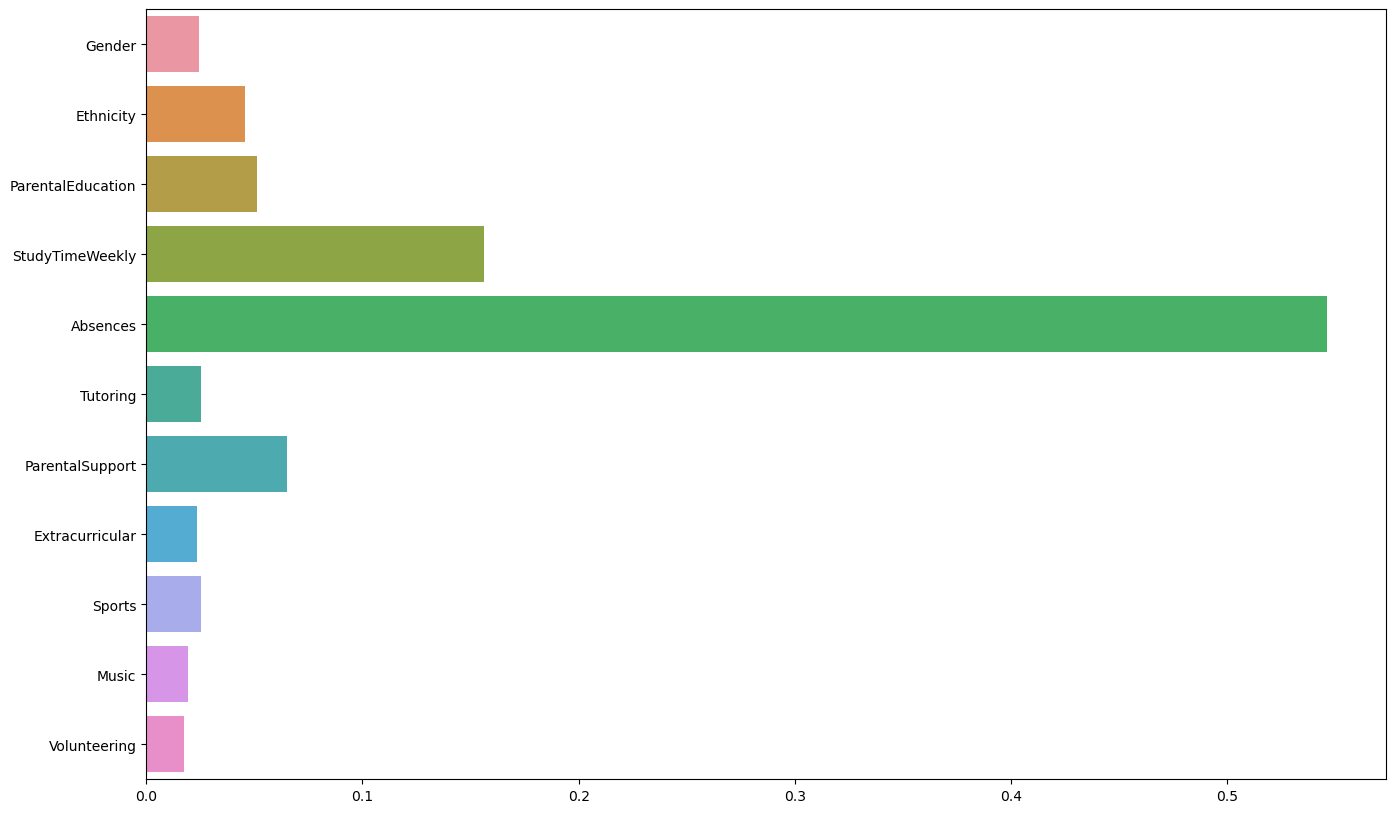

In [107]:
feat_imp=pd.Series(data=model.feature_importances_, index=X.columns)
plt.figure(figsize=(16,10))
ax=sns.barplot(y=feat_imp.index, x=feat_imp.values)

### Finally, a confusion matrix for us to visualize the accuracy of the model's predictions.

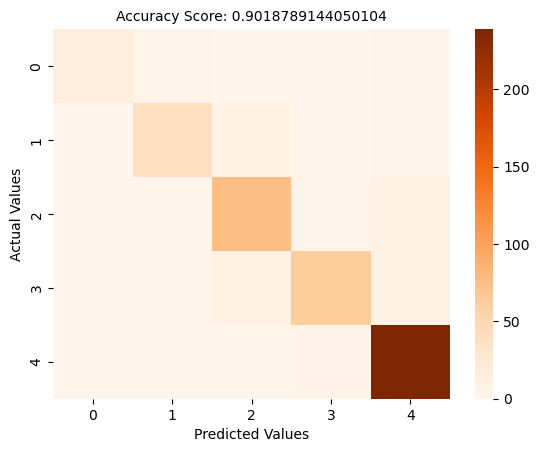

In [108]:
score=accuracy_score(y_test,pred)
cmatrix=confusion_matrix(y_test,pred)
sns.heatmap(cmatrix,cmap='Oranges')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=10)
plt.show()


## Conclusion
### The clearest insight we can gather from this data is that student performance is most drastically affected by the amount of absences they have. Therefore, if we are theoretical data scientists working with the school, our recommendation is intuitive. In order for this school to enhance their performance, the school should hammer down absence policies, so far as to disincentivize their students from skipping class.

### This was a very fun project and great way for myself to learn the random forest algorithm. For those of you who viewed (if anyone does), I always appreciate feedback, general comments, and upvotes!